# Machine Learning

## Linear Regression

In [1]:
# libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# dataset

data = pd.read_csv("datas/advertising.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

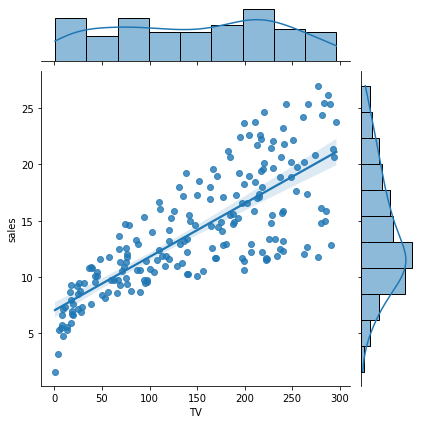

In [4]:
sns.jointplot(x=data['TV'], y=data['sales'], data=data, kind='reg');

In [5]:
X = data[['TV']]
y = data[['sales']]

linear_regression_model = LinearRegression()
#Fit method is used for fitting your training data into the model
linear_regression_model.fit(X,y)

LinearRegression()

In [6]:
print("Co-efficient of linear regression: ",linear_regression_model.coef_[0][0])
print("Intercept of linear regression model: ",linear_regression_model.intercept_[0])

Co-efficient of linear regression:  0.04753664043301975
Intercept of linear regression model:  7.032593549127695


## Visualization

(0.0, 28.27)

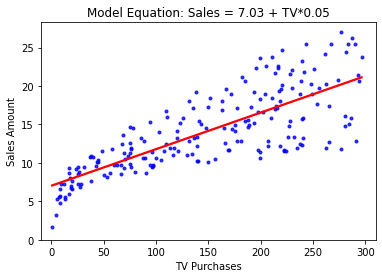

In [7]:
model_plot = sns.regplot(x=X,y=y, scatter_kws={'color':'b','s':9}, ci=False, color='r');
model_plot.set_title(f"Model Equation: Sales = {round(linear_regression_model.intercept_[0],2)} + TV*{round(linear_regression_model.coef_[0][0],2)}")
model_plot.set_ylabel("Sales Amount")
model_plot.set_xlabel("TV Purchases")
plt.xlim(-10,310)
plt.ylim(bottom= 0)

## Prediction

In [8]:
predictions = linear_regression_model.predict(X)

In [9]:
# parameters used for the model 
print(linear_regression_model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


## Error Analysis

In [10]:
print('Mean Square Error: ', mean_squared_error(y, predictions))
print('Mean Absolute Error: ', mean_absolute_error(y, predictions))

Mean Square Error:  10.512652915656757
Mean Absolute Error:  2.549806038927486


# Multiple Linear Regression

In [11]:
X = data.drop("sales",axis=1)
y = data[["sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('Train - Predictors shape', X_train.shape)
print('Test - Predictors shape', X_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (160, 3)
Test - Predictors shape (40, 3)
Train - Target shape (160, 1)
Test - Target shape (40, 1)


In [12]:
reg_model = LinearRegression().fit(X_train,y_train)
print("Co-efficient of linear regression: ",reg_model.coef_[0][0],reg_model.coef_[0][1],reg_model.coef_[0][2])
print("Intercept of linear regression model: ",reg_model.intercept_[0])

Co-efficient of linear regression:  0.043975458681142235 0.18968073215964062 0.0006438713603502677
Intercept of linear regression model:  3.232588189249313


Model equation is:

                sales = 2.86 + TV * 0.047 + radio * 0.179 + newspaper * 0.002

In [13]:
new_data = [[30],[10],[40]]
new_data = pd.DataFrame(new_data).T
reg_model.predict(new_data)

array([[6.47441413]])

In [14]:
y_pred = reg_model.predict(X_test)
print('Mean Square Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Square Error:  5.141913290425528
Mean Absolute Error:  1.4663253262125873


## Cross-Validation

**Cross-validation** is a technique to increase the amount of out-of-sample validation data available that is useful for modeling with *small datasets*. The key configuration parameter for k-fold cross-validation is k that defines the number folds in which to split a given dataset. Common values are k=**3**, k=**5**, and k=**10**, and by far the most **popular value** used in applied machine learning to evaluate models is k=**10**.

In [15]:
np.mean(np.sqrt(-cross_val_score(reg_model,
                                X,
                                y,
                                cv = 5,
                                scoring="neg_mean_squared_error")))

1.7175247278732084

# Linear Regression using Gradient Descent

                     ŷ = β + w * X

In [16]:
def calculate_cost(Y,b,X,w):

    '''
    This function calculates the mean square error by observing predicted value and actual value difference
    
    :param Y: the model
    :param b: the bias
    :param X: the input
    :param w: weight
    :type Y: int
    :type b: int
    :type X: int
    :type w: int
    
    :returns: the calculated mean square error value of the model
    '''
    
    m = len(Y) # number of observations
    sse = 0 # sum of square error
    
    for i in range(0,m):
        y_hat = b + X[i]*w
        y = Y[i]
        sse = sse + ((y_hat - y) ** 2) 
    
    mean_square_error = sse / m
    
    return mean_square_error

In [17]:
def update_weights(Y,b,X,w, learning_rate):
 
    '''
    This function calculates new values for bias and weight 
    
    :param Y: the model
    :param b: the bias
    :param X: the input
    :param w: weight
    :param learning_rate: the learning_rate value
    :type Y: int
    :type b: int
    :type X: int
    :type w: int
    :type learning_rate: float
    
    :returns: the new calculated values of the bias and weight
    '''
    
    m = len(Y)
    b_derivative_sum = 0
    w_derivative_sum = 0
    
    for i in range(0,m):
        y_hat = b + X[i]*w # predicted value
        y = Y[i] # actual value
        
        b_derivative_sum = b_derivative_sum + (y_hat - y)
        w_derivative_sum = w_derivative_sum + ((y_hat - y) * X[i])
        
    new_b = b - (learning_rate * (1/m) * b_derivative_sum)
    new_w = w - (learning_rate * (1/m) * w_derivative_sum)
    
    return new_b,new_w

In [18]:
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    
    print("Starting gradient descent at b={0}, w={1}, mse={2}".format(initial_b,initial_w,
                                                                      calculate_cost(Y,initial_b,X,initial_w)))
    
    b = initial_b
    w = initial_w
    cost_history = []
    
    for i in range(num_iters):      # error is calculated in each iteration
        b,w = update_weights(Y,b,X,w, learning_rate)
        mse = calculate_cost(Y,b,X,w)
        cost_history.append(mse)
        
        
        if i % 1000 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i,b,w,mse))
            
    
    print("After {0} iterations b={1}, w={2}, mse={3}".format(num_iters,b,w,
                                                                      calculate_cost(Y,b,X,w)))
    
    return cost_history,b,w

In [19]:
X = data["radio"]
y = data["sales"]

In [21]:
# hyperparameters

learning_rate = 0.001
initial_bias = 0.001
initial_weight = 0.001
number_of_iterations = 10000

cost_history ,b,w = train(y,initial_bias, initial_weight, X, learning_rate, number_of_iterations)

Starting gradient descent at b=0.001, w=0.001, mse=222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=2000    b=4.09    w=0.3623    mse=25.96
iter=3000    b=5.40    w=0.3223    mse=22.51
iter=4000    b=6.38    w=0.2923    mse=20.58
iter=5000    b=7.11    w=0.2698    mse=19.49
iter=6000    b=7.66    w=0.2530    mse=18.88
iter=7000    b=8.08    w=0.2403    mse=18.53
iter=8000    b=8.38    w=0.2309    mse=18.34
iter=9000    b=8.62    w=0.2238    mse=18.23
After 10000 iterations b=8.79062282139543, w=0.2184390657183005, mse=18.170680975262957
